### Linear Regression in PyTorch

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.tensor as tensor
import torch.nn as nn
import numpy as np


In [82]:
n=100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.5847,  1.0000],
        [ 0.1697,  1.0000],
        [ 0.1738,  1.0000],
        [ 0.1935,  1.0000],
        [-0.1673,  1.0000]])

In [83]:
a = tensor([3.,2.]); a
y = x@a + torch.rand(n)

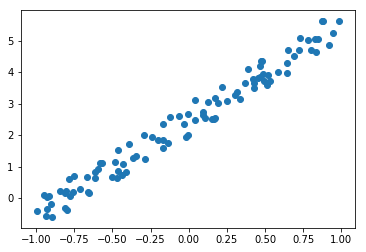

In [84]:
plt.scatter(x[:,0], y);

In [85]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [86]:
a = nn.Parameter(a); a

Parameter containing:
tensor([3., 2.], requires_grad=True)

In [87]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [88]:
lr = 1e-1
for t in range(100): update()

tensor(0.3118, grad_fn=<MeanBackward1>)
tensor(0.0917, grad_fn=<MeanBackward1>)
tensor(0.0892, grad_fn=<MeanBackward1>)
tensor(0.0891, grad_fn=<MeanBackward1>)
tensor(0.0891, grad_fn=<MeanBackward1>)
tensor(0.0891, grad_fn=<MeanBackward1>)
tensor(0.0891, grad_fn=<MeanBackward1>)
tensor(0.0891, grad_fn=<MeanBackward1>)
tensor(0.0891, grad_fn=<MeanBackward1>)
tensor(0.0891, grad_fn=<MeanBackward1>)


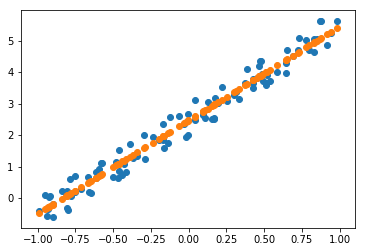

In [89]:
plt.scatter(x[:,0],y)
y_hat = x@a.detach()
plt.scatter(x[:,0],y_hat);

In [90]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [91]:
a = nn.Parameter(tensor([-1.,1]))
y_hat = x@a.detach()

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0].numpy(), y_hat.numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)
